# **Lecture 23 - Simple Linear Regression - Numeric Variables**

---

<br>

### Packages

In [ ]:
# none

---

<br>

### Simple Linear Regression

* Below is our example data of oil changes and repair costs

In [ ]:
costs <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/refs/heads/main/oil.csv")
costs

oilChanges,repairs,miles
<int>,<int>,<int>
3,300,20100
5,300,23200
2,500,19200
3,400,22100
1,700,18400
4,420,23400
6,100,17900
4,290,19900
3,475,20100


#### Always Plot Your Data!!!

* When fitting a regression (or doing any analysis), we ALWAYS first plot our data

* Plotting our data will help us determine if the relationship is linear or perhaps some other relationship (quadratic, logarithmic, etc.)

* Since the data appear linear, we can model the relationship between repair costs (`y`) and oil changes (`x`) using the equation of a line.

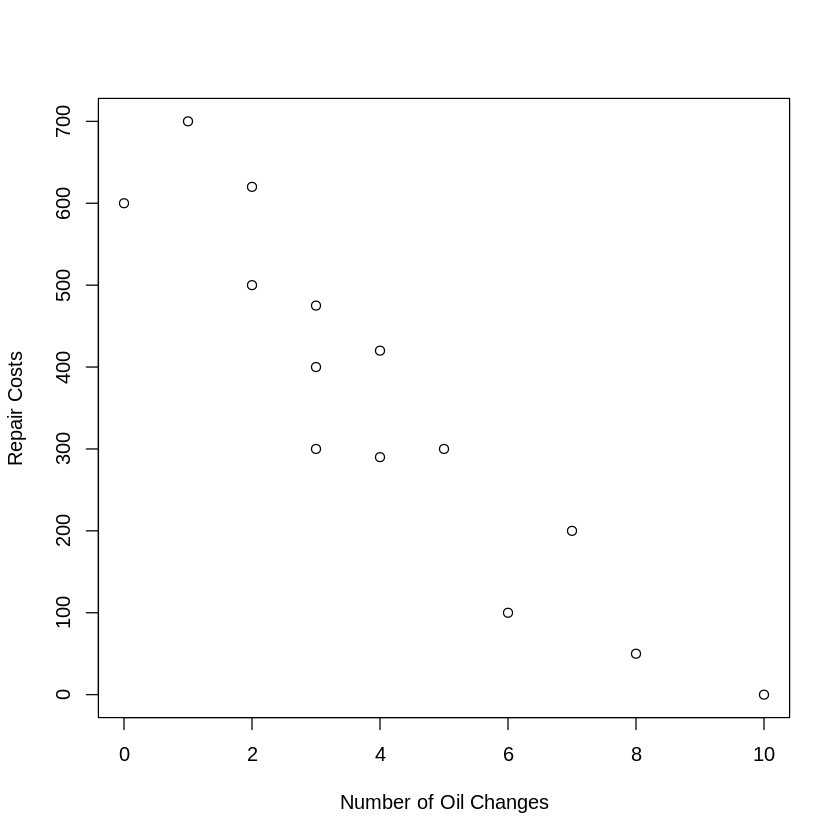

In [ ]:
# visualize the relationship between two variables
plot(costs$oilChanges, costs$repairs,
     xlab = "Number of Oil Changes",
     ylab = "Repair Costs")

#### Fitting a Simple Linear Regression

* To fit a linear regression, we use the `lm(formula, data)` function with the following arguments
  * `formula` : the regression formula. To regress `y` on `x`, we specify `formula = y~x`
  * `data` : the data frame containing our variables `y` and `x`


* For example, we regress `repairs` (y) on `oilChanges` (x) below

In [ ]:
# fit simple linear regression model
fit <- lm(formula = repairs ~ oilChanges, data = costs)
fit


Call:
lm(formula = repairs ~ oilChanges, data = costs)

Coefficients:
(Intercept)   oilChanges  
     652.19       -71.99  


* The intercept estimate $\hat{b}$ and slope estimate $\hat{m}$ are called coefficients

* We can extract the coefficients of the fitted regression model using the `coef()` function

In [ ]:
# extract coefficients
print(coef(fit))

(Intercept)  oilChanges 
  652.19101   -71.99438 


In [ ]:
# store each
intercept <- coef(fit)[1]
intercept

slope     <- coef(fit)[2]
slope

(Intercept) 
    652.191

oilChanges 
 -71.99438

#### Interpretation of Regression Model

* The coefficients from our fitted regression model indicates the following regression line/model

\begin{align*}
\text{Repair Costs} = -71.99 \times \text{Oil Changes} + 652.19
\end{align*}

* intercept
  * Repair costs are $652 on average for vehicles with zero oil changes

* slope
  * For each additional oil change, repair costs decrease by $72

#### Plotting the Simple Linear Regression Fit

* If we are fitting a regression line, we can plot our regression line using the function `abline()`

* The argument to `abline()` is our regression model `fit`

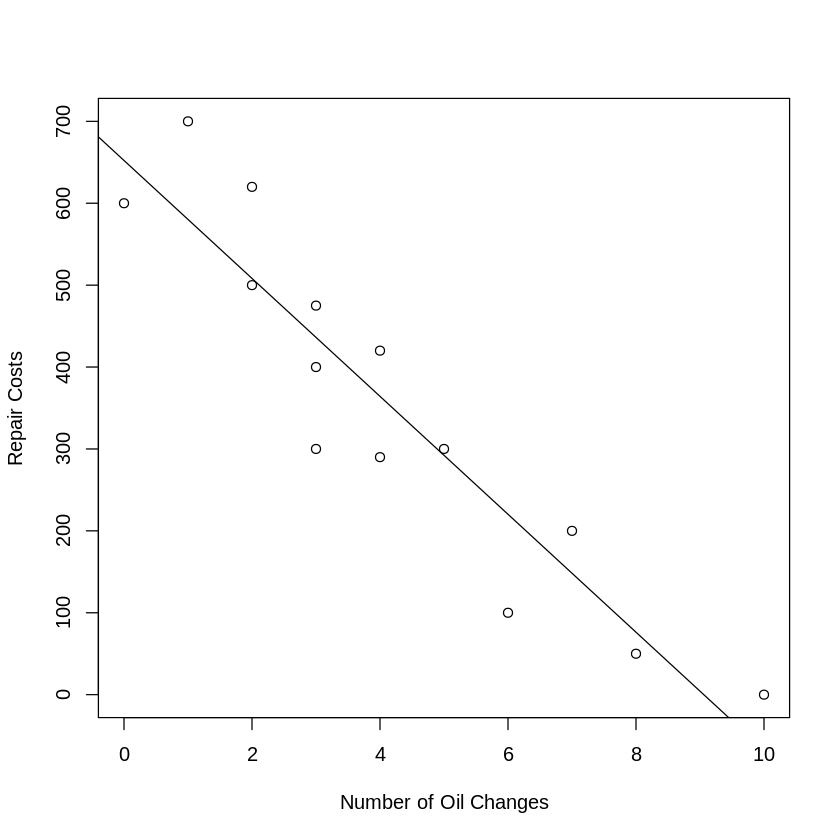

In [ ]:
# visualize the relationship between two variables
plot(costs$oilChanges, costs$repairs,
     xlab = "Number of Oil Changes",
     ylab = "Repair Costs")
abline(fit)

---

<br>

### Bootstrap Confidence Intervals

* Similar to the sample mean, we can create bootstrap confidence intervals for the regression estimates (intercept and slope)

* The bootstrapping procedure for confidence intervals is performed as follows

  1. Let `n` be the size of our sample. We first randomly sample `n` observations ***with replacement*** from our sample data. This is called a bootstrapped sample

  2. Fit a regression on this bootstrapped sample and save the estimates (intercept and slope)

  3. Repeat steps 1 and 2 many times (e.g., `B > 500`). For example, if `B = 1000`, this will produce `B = 1000` intercept estimates and `B = 1000` slope estimates

  3. Compute lower (e.g., 2.5%) and upper (97.5%) percentiles of your `B = 1000` intercepts and `B = 1000` slopes, which define our (95%) confidence interval

* **Step 1:** Randomly sample `n` observations with replacement from our sample

  * Since we are sampling WITH replacement, note that some individuals in our bootstrapped sample may appear more than once or not at all!

* **Step 2:** Compute the statistics in which we are interested

  * We'll compute the intercept and slope estimates

* **Step 3:** Repeat steps 1 and 2 many times (e.g., `B > 500`).

  * Let's use `B = 1000` bootstrap samples.
  * We can calculate the 1000 bootstrap intercept and slope estimates using a `for` loop

* **Step 4:** Compute lower (e.g., 2.5%) and upper (97.5%) percentiles of your `B = 1000` means, which define our (95%) confidence interval

In [ ]:
# sample size
n <- nrow(costs)
n

# sample indexes
boot_index <- sample(1:nrow(costs), size = n, replace = TRUE)
boot_index

# extract bootstrap sample
boot_samp <- costs[boot_index,]
boot_samp

# compute mean of random sample
boot_fit <- lm(repairs~oilChanges, data = boot_samp)
print(coef(boot_fit))

# number of bootstrap samples
B <- 1000

# sample size
n <- nrow(costs)

# compute B bootstrap means
boot_intercepts <- vector(length = B)
boot_slopes     <- vector(length = B)

# loop to calculate many bootstrap means
for (i in 1:B) {

  # sample indexes
  boot_index <- sample(1:nrow(costs), size = n, replace = TRUE)

  # extract bootstrap sample
  boot_samp <- costs[boot_index,]

  # compute regression coefficients of single bootstrap sample
  boot_fit <- lm(repairs~oilChanges, data = boot_samp)

  # store the bootstrap regression coefficients
  boot_intercepts[i] <- coef(boot_fit)[1]
  boot_slopes[i]     <- coef(boot_fit)[2]

}

# 95% confidence interval for intercept
print(quantile(boot_intercepts, probs = c(0.025, 0.975)))

# 95% confidence interval for slope
print(quantile(boot_slopes, probs = c(0.025, 0.975)))

[1] 14

#### Complete Interpretation

* From our original regression model, for each additional oil change, repair costs decrease by \$72 ($\hat{m}$)

* We are 95% confident the true population slope is in the interval above

* Since zero is outside the 95% confidence interval, we can say that the slope describing the relationship between repair costs and oil changes is significantly LESS THAN zero

* We can also say there is a significant negative correlation between repair costs and the number of oil changes

---

<br>

#### Disclaimer!

* We have only covered linear relationships

* If your scatterplot suggests a nonlinear relationship, such as a quadratic, we must model the data accordingly!!!

# Course Transcript

Hi class. So for today's lecture, we're going to cover simple linear regression, specifically using numeric variables. So we'll have a numeric variable for our Y variable and a numeric variable for our X variable. And I'll go into what that means soon.

All right. So let's jump right into it. The simple linear regression model.

Alright. To illustrate this concept of simple linear regression, let's look at this scenario. So imagine you're working for a tech company. Specifically, Amazon. Right. They have tons of Amazon delivery trucks going around delivering our packages. And imagine you manage these trucks. Say, in the local area like San Diego. Okay?

And you've been tasked by your supervisor to improve the overall efficiency of that operation. Now, there are many things you can do. But you have this idea. Well, let's look at the maintenance costs for these vehicles as well. Right? So say you want to determine if Amazon should spend a little more money on oil changes like maintenance

in order to reduce overall repair costs. All right. So you can, you know, improve the efficiency of that operation.

So in that case, you know, you go to your SQL. Database manager. You ask them for this data. They run a query and provide you with this data. Now, typically, you have a much larger table. But for simplicity. Let's just say you have data on oil changes, right? The number of oil changes, the repair costs and the mileage of the vehicle. But for now we're going to focus on just repair costs and oil changes.

Now before fitting any regression model right before modeling any type of data. You always need to plot or visualize your data. And the reason is by visualizing the relationship between variables that informs you on how to model. Your data according right? So visualization informs you how to run your regression models or structure your regression models.

So let's go ahead and create a scatterplot.

So we have repair costs, which is our dependent, variable on the y-axis and oil changes, which is our independent variable on the X-axis.

These are also known as response repair, repair costs or y variables known as a response and oil changes as a predictor.

Now, just from this visualization.

what relationship do you see right? Is it a line? Is it quadratic? Is there a relationship in general? Right? Well, if you look at it, we can see there's definitely a relationship. Here, right? As we increase the number of oil changes, the amount for repair costs actually goes down right. In fact, it goes down pretty much linearly, meaning. It goes down like a line with a constant rate of change, a constant slope.

You can argue that this could be somewhat quadratic right if you were to draw this here.

But for simplicity, we're going to assume that it is just a line.

Alright. So we have our line here.

Now, how can we represent this line using an equation right? We're going to be modeling the relationship between repair costs and oil changes, using some mathematical or statistical model. So we need the equation of our model right? So we can use the equation of a line

right? So we have our Y variable here, which is our repair costs

our X variable here, which is our oil changes.

and then we have our slope, which is negative, right? Because it's going downward. So there's a negative trend here.

and we have our Y intercept. So if we carry it over here, Y intercepts about 700, right? So this is a line that sort of visually fits our data visually fits the relationship between these 2 variables.

All right. So we use this equation to model the data. Now, when modeling, using a single X variable. This is called simple linear regression. If you model with multiple X variables, it's called multiple linear regression. But for today, we're only going to focus on Slr or simple linear regression.

Okay, now, if you look at this line, we have all of our data points here, right?

And our line falls here. The trouble is, our line isn't perfect. It doesn't fit the data perfectly. And that's okay. We just wanna model the general trend.

But since our regression model, right? Our line doesn't model the data perfectly

right. We add an error term. So just fully fully specify this model.

We write our data right, our data. Y, as some equation of a line so like this point here.

plus some deviation from that line which we call random statistical error.

Now, that's about all I'll go into in terms of this epsilon term, this random statistical error. That's actually quite an important term which enables us to perform a lot of inference which you'll learn in another class. But for now I just want you to learn this general concept, right? That we have this relationship between 2 variables.

We model this relationship using some sort of equation like the equation of a line.

And since it's not perfect, there's some deviation from that line, right, which is our error term.

This is known as our statistical model.

So just to finally specify our simple linear regression model right? Every simple linear regression model has our response variable. Y

right, our predictor variable. X, also known as our independent variable.

We have the slope which describes the rate of change between these 2 variables, our Y intercept

and some error term describing the deviation of points from that line. Right? And I won't go into the error term much anymore. That's that's pretty much that. All right. So this approach, simple linear regression, is essentially used to study the relationship between 2 variables such as this here, right? So this slope actually means something. And we'll go into that later today.

All right. So we covered that simple linear regression model as it models the relationship between 2 variables. In this case we model the relationship between repair costs and oil changes.

Now, this above equation is our theoretical model, right? The thing is, we actually don't know M or B, so we don't know the true population slope M, and we don't know the true population intercept B.

Right? So how would we estimate this?

Well, what we do is we actually take a random sample, just like the sample mean, we take a random sample from the population and then estimate our regression model from our sample, which gives us our slope M and our intercept B estimates. Right?

So when we have the slope, M estimate and intercept B estimate from our sample that estimates our true population values.

So just to reiterate, similar to how we, you know, use the sample mean to estimate the true population mean, the true population slope M, for all Amazon trucks right in the world are used using M hat, which is the slope estimated from a sample of the Amazon trucks.

Same thing with the true population intercept, that's estimated using the sample intercept. So the regression intercept from our sample.

The thing is, how do we determine the best values for M and B? Right? How do we actually get our slope estimates and intercept estimates? To be honest, when we look at this data here, all I did was just draw a line.

Right? But there are an infinite number of lines that we could fit.

Okay.

Right? Any ideas on how to estimate the best line, like, what is the best line? What would that mean?

Well, in statistics the best line is the line that has a slope and an intercept that minimizes the distance between the points and the line. So if we were to take the absolute value or square them and add up all these little distances. We want that average distance to be as small as possible.

Okay, and that's what we define as our line of best fit to our data, our sample.

The thing is, there are an infinite model, an infinite number of models that we can choose from. As I said before, right? So here's 1 option. Now, this is completely wrong because we have a positive slope. And it's very obvious that the relationship is negative. Right? So we have this massive error here we have this massive error here, this error, this error. So this is a horrible line of best fit. But it is still a possible line. Right?

Here's another example where we set the slope to 0. So technically, this is just a Y intercept type model. But again, we have massive errors here, and we want our errors to be as small as possible.

The thing is, we're very fortunate that there are algorithms out there which you won't study for some time right? But there are algorithms that enable us to find the optimal slope in optimal intercept. That is, there are algorithms out there which will use R right that can find M hat, our slope estimate and B hat our intercept estimate where the distance between our points in the line are as small as possible.

Alright. So this is again more on more for your other classes. It's a bit more advanced for this class.

But mainly I want you to understand that we're modeling this data using the equation of a line. And there's an algorithm that estimates the optimal slope and intercept for us.

And using our estimated model. Right? We have this or using our, we have our estimated model here. So we've estimated 652, right? So that goes to maybe right about there being our optimal y-intercept and negative 72 being our optimal slope.

All right. So here are our estimates. And again, M hat estimates the true population slope of all Amazon trucks being negative 72, and B hat estimates the true population intercept.

All right. So we've collected our data. We've plotted our data. We've determined that from our visualization we have a linear relationship that is negative. Then we went into R and fit a regression which actually estimates the slope and intercept of that line, the line being the model that approximates the relationship between those 2 variables. Now, what? We have our estimate of intercept and our estimate of slope here and here.

Well remember when we were looking at bootstrapping, the sample mean only estimated the true population. Same thing here.

But how do we interpret these parameters? Well, the way to interpret the intercept, which you likely know from your other classes in high school, it's just the average response of Y when X equals 0.

So if we were to set oil changes to 0, the 72 would cancel, and we're left with repair costs equaling to 652.

So the way to interpret in simple linear regression the intercept is the average Y value with X being a value of 0. So a way to say this is: on average, the repair costs of these vehicles are $652 if we have 0 oil changes on them. And I want to emphasize that the intercept may not make sense for the most part, but more commonly we want to interpret the slope which will be next.

All right, the slope. So the slope is just the change in Y over change in X, and again, I assume that you know what the slope is and how to interpret it. But in the context of simple linear regression, it's basically the average change in Y if we were to change X by a single unit. So if we were to change X by one. So remember, our slope estimate is negative 72.

This means that if we change the oil changes by a single oil change, the average repair cost will drop by $72. So this is more thinking ahead and performing your maintenance costs — the repair costs in the future actually can decrease.

That's called preventive maintenance. So on average, repair costs decrease by $72 with each additional oil change. This is how you would interpret that slope estimate.

All right. So now for inference, right? The slope and intercepts — they're computed from our sample of data. And this is typically because we can't collect data on the entire population.

And similar to the sample mean, our slope and intercept estimates vary from sample to sample. If we were to take a random sample of the Amazon trucks in the world and run a regression, the slope for that regression will likely be different from the slope of the regression from another sample. So we have sampling variability here.

So now we can perform inference like we did for the sample mean, but we do so on the intercept and slope estimates.

So this means we can use bootstrapping to estimate the sampling distribution of M hat and B hat. And again, more likely, we're going to use M hat, which is the slope just because that describes more the relationship between these 2 variables.

All right. So what we're going to do is use bootstrap to estimate the sampling distribution. And then we use that sampling distribution to create confidence intervals. And then we can conduct inference — same as before with a sample mean. And we're going to go into our code eventually for this.

So using a bootstrap confidence interval, if the slope is not significantly different from 0, so if 0 is contained within that confidence interval, then that means there is no significant relationship between X and Y.

So if this slope estimate we find using the confidence interval is not significantly different from 0, then there's no significant relationship. However, if 0 is not within the interval, that means the true population slope is significantly different from 0.

That means there is a significant relationship or correlation between the 2 variables.

Now, that was a lot on this slide. But we're going to go through this bit by bit, using our code. Next.

Okay.

Alright. So let's actually use R to fit our simple linear regression, and then conduct inference using Bootstrap, just like we did with the sampling.

Here we're going to load the data. This is the data from the slides. So we have our oil changes on the left and then our repair costs. So we're interested in the relationship between these 2 variables.

As I said before in the slides, you always need to plot your data before fitting a regression. By plotting our data, it'll help us determine how we structure the relationship between the variables. So currently, we're only studying the equation of a line. But technically, you can use the logarithm, you can use quadratic, and so on, to model the relationship between different variables.

So we're going to go plot this here using base R code.

Since the data appear linear, we can model the relationship between our response variable or our Y variable, repair costs, and the number of oil changes, which is our predictor variable or X variable, using the equation of a line, because we've established that that is indeed appearing to be a linear trend.

Now, how do we fit a simple linear regression in R?

Well, there's a function called lm. lm stands for linear model. And although it takes several arguments as input, you really only need 2 arguments as input.

The 1st argument is formula, and the second is data.

Now, I'll jump to data. Data is just the data frame containing all of our variables. So this will be our costs data frame up here containing our 2 variables of interest.

Then finally, there's formula. This is the equation in a way — in R syntax though — this is the equation of our regression model. So because we're fitting a line, we insert the formula for a line, and it's a little different from mathematical notation. But the way we would do this is y ~ x. So we take our Y variable, tilde, and then X.

This is essentially equivalent to Y equaling the equation of a line where X is our predictor variable.

So just remember, people do mix this up. It's y ~ x, not x ~ y. So let's jump into an example.

We're going to use the lm or linear model function. We're going to specify our formula as regressing repair costs — so repairs ~ oilchanges. So this means we want to estimate a slope and intercept estimate of this regression equation. And we're going to set our data equal to our costs data frame containing the variables in which we're modeling.

So I run that. And I stored it as an object or variable called fit. You can see that if I check the class of fit, it is a linear model class. And automatically, it outputs our intercept value 652, and it says oilchanges, but this is our slope value.

Now, the intercept estimate b-hat, which is 652, and the slope estimate -72 — these are called coefficients.

So since we also call them coefficients or estimates, in R we use the coef function for coefficients to actually extract these as a vector.

So what I'm going to do: I have my linear model fit here. I'm going to use coef to pull the coefficients from fit.

Alright. So now, it's a vector so I can do anything with this vector. I can add 10 if I wanted to, and it added 10 to each one. Or not print, but I can add 10, and it added 10 to each value here. So it's just your standard numeric vector. In fact, I could show you the class. That's probably a better way to do it. It's just a numeric vector of length 2, describing our intercept and slope for oil changes.

So what I'm going to do here is just store each. I'm going to use indexing or subsetting to pull the first value of coef(fit) — store it as our intercept, which is this value here. And then I'm going to take our second value from our regression fit, our second coefficient, and store that as our slope.

Okay, so now we have those stored.

Alright. So we have our intercept and slope estimates stored here, or coefficients.

Now, how would we interpret those? We went over those a bit in slides. But let's go over those again. Right? So from this summary here, from this regression equation, we can rewrite this as the mathematical formula we’re more familiar with.

So we're going to say, repair costs is equal to our slope minus 71 times oil changes, our X variable, plus our Y intercept. This is our fitted or estimated regression line which approximates the relationship between repair costs and number of oil changes.

Alright. So the way we interpret this is: the intercept is, repair costs are $652 on average when we set oil changes to 0. Right? So for 0 oil changes, the repair costs for these vehicles are about $650 on average.

For the slope: for each additional oil change, repair costs decrease by $72. Right? So if we increase our X variable by a single unit, the slope is the average drop in the Y value.

Now, we can also plot a regression fit. This will be a little more difficult with other types of regressions, but for a simple linear regression it's much easier. So there's a function called abline.

And one of the inputs that abline can take is the linear model class — so it’s just our regression fit. So what I’m going to do here is plot our two variables, and then I’m gonna say abline(fit), and this will overlay the regression line onto our scatter plot.

So here we have our fitted regression line. You could see that the Y intercept — it touches around 650, right? And we have a large negative slope — that’s -72 based on our regression summary here.

Alright. So that’s pretty much everything you need to know about fitting the regression and visualizing it on a scatter plot.

But even more important, next we’re going to cover inference — statistical inference of the slope parameter using bootstrapping.

Alright. Bootstrap confidence intervals.

So remember, similar to the sample mean, we had our population, we would take a sample, calculate the mean of the sample, and then run bootstrap to conduct inference on the mean. Similar to that, we can actually create bootstrap confidence intervals for our regression estimates as well.

The process is slightly different, but overall very similar, and I'll go into it step by step.

So here's the procedure:
First, we take our sample size n — we can use nrow() to define our sample size.

Then we randomly sample n rows (same number) with replacement from our sample data. This is our bootstrapped sample.

Then, with that single sample — not the original data but the bootstrap sample — we fit a regression and store the intercept and slope from the regression on that bootstrap sample.

Essentially, we just repeat those first two steps many times — 500 to 1000 or even 2000 times — and we store every single slope and every single intercept from all of those bootstrap samples.
So if we resample 1000 times, we’ll have 1000 intercept estimates and 1000 slope estimates.

Then, from those intercept and slope estimates, we can compute confidence intervals from those sampling distributions, and then conduct inference using those.

Let’s correct a typo quickly — “replacement” — so:

Step 1: randomly sample n observations with replacement.

We take our sample size, which is 14 (there are 14 different trucks). Then we use the sample() function and sample from a vector 1 through 14 with replacement.
So, for example, 11 occurred three times. That means the 11th row will appear three times in our bootstrap sample — and some rows may not appear at all.

From that single bootstrap sample, we compute the slope and intercept estimates using the lm() function (as we just learned). So we regress repair costs on oil changes, store it as boot_fit, and extract the coefficients.

Notice this result is slightly different — we’re estimating the sampling variability of that estimate.

Step 3: repeat this over and over again.

We set the number of bootstrap samples to 1000, and sample size to 14. We initialize empty vectors to store the intercepts and slopes for each iteration.

In the for loop:

    We take a random sample (our bootstrap sample)

    Fit the regression model on that sample

    Store the intercept and slope in their respective vectors

At the end of the loop, we have 1000 intercepts and 1000 slopes.

Now we have our bootstrap distributions.
Looking at the distribution of bootstrap slopes — it's centered around -70, which is close to the sample slope.
This is our sampling distribution for the slope estimate.

From that distribution, we compute the quantiles — just like with the sample mean.
We calculate the 2.5th and 97.5th percentiles — the 95% confidence interval — for the intercept and the slope.

Now, let’s interpret these:

From our original regression model: for each additional oil change, repair costs decreased by $72 — that’s our slope estimate.

Now, we are 95% confident that the true slope describing the relationship between repair costs and oil changes is in this interval — between -94 and -60.

Since 0 is not in this interval, we say the slope is significantly less than 0.
We can also say it is significantly different from 0.

This means there is a significant relationship between the two variables — if one changes, the other also changes.
So there is a significant negative correlation between repair costs and the number of oil changes.

Final point, just a disclaimer:

Today we only covered modeling a linear relationship using the equation of a line.
But if you see a nonlinear relationship (like quadratic), you must change the equation accordingly — for example, to a quadratic:
  ax² + bx + c
In that case, you'd estimate a, b, and c, but we won't get into that today.


